In [2]:
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m

import plotly.plotly as py
import plotly.graph_objs as go

In [3]:
broken_df = pd.read_csv('datos_acelerometro.csv')

Muestra las primeras filas de la tabla de forma ordenada

In [4]:
broken_df.head()

,"Time;""Z"";""Y"";""X"";""IdAntenna"";""RSSI"";""Phase"";""Frequency"";""Activity"""
0,"0.25;""-0.044557"";""0.93932"";""0.11175"";""1"";""-60""..."
1,"0.75;""-0.044557"";""0.93932"";""0.11175"";""3"";""-68...."
2,"1.5;""-0.044557"";""0.93932"";""0.11175"";""4"";""-57.5..."
3,"2.5;""0.61207"";""0.89339"";""0.0091224"";""4"";""-57.5..."
4,"3;""0.61207"";""0.89339"";""0.0091224"";""1"";""-65"";""3..."


In [5]:
# Miremos las primeras 3 filas sin acomodar
broken_df[:3]

,"Time;""Z"";""Y"";""X"";""IdAntenna"";""RSSI"";""Phase"";""Frequency"";""Activity"""
0,"0.25;""-0.044557"";""0.93932"";""0.11175"";""1"";""-60""..."
1,"0.75;""-0.044557"";""0.93932"";""0.11175"";""3"";""-68...."
2,"1.5;""-0.044557"";""0.93932"";""0.11175"";""4"";""-57.5..."


In [6]:
fixed_df = pd.read_csv('datos_acelerometro.csv', sep=';', encoding='utf-8') # index_col='Time'
fixed_df[:3]

,Time,Z,Y,X,IdAntenna,RSSI,Phase,Frequency,Activity
0,0.25,-0.044557,0.93932,0.11175,1,-60.0,0.46940,920.25,4
1,0.75,-0.044557,0.93932,0.11175,3,-68.5,0.15033,923.25,1
2,1.50,-0.044557,0.93932,0.11175,4,-57.5,5.10820,925.75,1


Se arreglan algunas caracteristicas de la tabla. El separados se establece como ",", la codificicacion se cambia a latin1.

Mostremos los datos de solo una columna:

In [7]:
fixed_df['Y']

0      0.93932
1      0.93932
2      0.93932
3      0.89339
4      0.89339
5      0.83597
6      0.90487
7      0.87042
8      0.87042
9      0.96229
10     0.96229
11     0.89339
12     0.89339
13     0.89339
14     0.90487
15     0.90487
16     0.90487
17     0.90487
18     0.93932
19     0.96229
20     0.81301
21     0.88191
22     0.88191
23     0.88191
24     0.88191
25     0.88191
26     0.87042
27     0.87042
28     0.90487
29     0.90487
        ...   
229   -0.19751
230   -0.19751
231   -0.33531
232   -0.20899
233   -0.19751
234   -0.18603
235   -0.19751
236   -0.19751
237   -0.19751
238   -0.18603
239   -0.19751
240   -0.17454
241   -0.26641
242   -0.26641
243   -0.17454
244   -0.17454
245   -0.18603
246   -0.18603
247   -0.18603
248   -0.16306
249   -0.17454
250   -0.20899
251   -0.18603
252   -0.16306
253    0.16995
254    0.16995
255    0.16995
256    0.97377
257    0.97377
258    0.97377
Name: Y, Length: 259, dtype: float64

Y grafiquemosla:

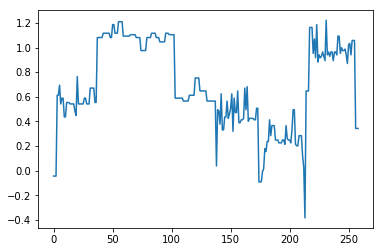

In [8]:
fixed_df['Z'].plot()

In [9]:
# Creamos una nueva tabla vacia
operaciones = pd.DataFrame()
operaciones

""


In [10]:
# Creamos una nueva columna en operaciones que contendra 2*IdAntenna, perteneciente a la tabla fixed_df
operaciones['2*IdAntenna'] =  2*fixed_df['IdAntenna']
operaciones

,2*IdAntenna
0,2
1,6
2,8
3,8
4,2
5,8
6,2
7,8
8,2
9,8


In [11]:
# Con la funcion .loc podemos ubicar una fila por su index
operaciones.loc[258]
operaciones['Mult']=1 # Creamos previamente la columna Mult y la llenamos de 1

In [12]:
# Utilizando "operaciones.tail(1).index.item()" nos situamos en el ultimo número del index

for x in range(0,operaciones.tail(1).index.item()): 
    operaciones.loc[x]['Mult']=  operaciones.loc[x]['2*IdAntenna']+operaciones.loc[x+1]['2*IdAntenna'] 
    x=x+1;
operaciones

,2*IdAntenna,Mult
0,2,8
1,6,14
2,8,16
3,8,10
4,2,10
5,8,10
6,2,10
7,8,10
8,2,10
9,8,16


Dos valores importantes para el analisis de datos obtenidos con un acelerometro, son SVM (magnitud del vector) y el SMA (magnitud del area). Procederemos a calcular el SMA primero y guardarl en la tabla operaciones:
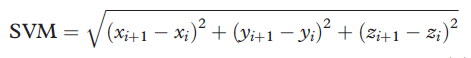

In [13]:
# ¿Es posible borrar columnas?
del operaciones['2*IdAntenna']
del operaciones['Mult']
operaciones

""
0
1
2
3
4
5
6
7
8
9


In [14]:
operaciones['Resta_z']=1
operaciones['Resta_z']=operaciones.Resta_z.astype(float) # Señalamos que la columna será float

for x in range(0,operaciones.tail(1).index.item()): 
    operaciones.loc[x]['Resta_z']= (fixed_df.loc[x+1]['Z']-fixed_df.loc[x]['Z'])**2
    x=x+1;

# Repetimos la operacion los datos en X y Y

operaciones['Resta_y']=1
operaciones['Resta_y']=operaciones.Resta_z.astype(float) # Señalamos que la columna será float

for x in range(0,operaciones.tail(1).index.item()): 
    operaciones.loc[x]['Resta_y']= (fixed_df.loc[x+1]['Y']-fixed_df.loc[x]['Y'])**2
    x=x+1;    
    
    
operaciones['Resta_x']=1
operaciones['Resta_x']=operaciones.Resta_z.astype(float) # Señalamos que la columna será float

for x in range(0,operaciones.tail(1).index.item()): 
    operaciones.loc[x]['Resta_x']= (fixed_df.loc[x+1]['X']-fixed_df.loc[x]['X'])**2
    x=x+1;    
      

operaciones

,Resta_z,Resta_y,Resta_x
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,0.431159,0.002110,0.010532
3,0.000000,0.000000,0.000000
4,0.006735,0.003297,0.002081
5,0.023235,0.004747,0.002081
6,0.002201,0.001187,0.002080
7,0.000000,0.000000,0.000000
8,0.023235,0.008440,0.001170
9,0.000000,0.000000,0.000000


Finalmente sumamos todo y lo elevamos al cuadrado

In [17]:
operaciones['SVM']=1
operaciones['SVM']=operaciones.SVM.astype(float) # Señalamos que la columna será float

for x in range(0,operaciones.tail(1).index.item()): 
    operaciones.loc[x]['SVM']= np.sqrt(operaciones.loc[x]['Resta_x']+operaciones.loc[x]['Resta_y']+operaciones.loc[x]['Resta_z'])
    x=x+1;

    
operaciones 

,Resta_z,Resta_y,Resta_x,SVM
0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.431159,0.002110,0.010532,0.666184
3,0.000000,0.000000,0.000000,0.000000
4,0.006735,0.003297,0.002081,0.110059
5,0.023235,0.004747,0.002081,0.173386
6,0.002201,0.001187,0.002080,0.073945
7,0.000000,0.000000,0.000000,0.000000
8,0.023235,0.008440,0.001170,0.181233
9,0.000000,0.000000,0.000000,0.000000


Con un pico de del SVM es posible detectar una caida

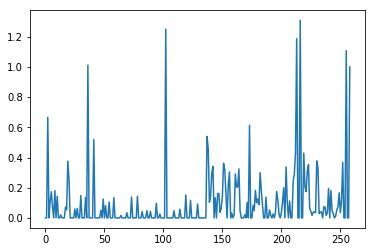

In [18]:
operaciones['SVM'].plot()

Ahora se calculará el SMA (magnitud del area).

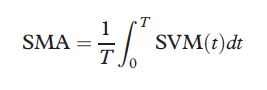

In [19]:
# La integral se aproximará a una suma. Para ello se creará la columna auxiliar sumTime
operaciones['sumTime']=0 # Se crea y se llena de 0s la columna
operaciones['sumTime']= operaciones.sumTime.astype(float)
operaciones

,Resta_z,Resta_y,Resta_x,SVM,sumTime
0,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.0
2,0.431159,0.002110,0.010532,0.666184,0.0
3,0.000000,0.000000,0.000000,0.000000,0.0
4,0.006735,0.003297,0.002081,0.110059,0.0
5,0.023235,0.004747,0.002081,0.173386,0.0
6,0.002201,0.001187,0.002080,0.073945,0.0
7,0.000000,0.000000,0.000000,0.000000,0.0
8,0.023235,0.008440,0.001170,0.181233,0.0
9,0.000000,0.000000,0.000000,0.000000,0.0


In [20]:
# La suma de los tiempos se realizará cada 3 muestras 
for x in range(0,operaciones.tail(1).index.item(),3): 
    operaciones.loc[x]['sumTime']= (fixed_df.loc[x+2]['Time']-fixed_df.loc[x]['Time'])
    operaciones.loc[x+1]['sumTime']= (fixed_df.loc[x+2]['Time']-fixed_df.loc[x]['Time'])
    operaciones.loc[x+2]['sumTime']= (fixed_df.loc[x+2]['Time']-fixed_df.loc[x]['Time'])
    
operaciones


,Resta_z,Resta_y,Resta_x,SVM,sumTime
0,0.000000,0.000000,0.000000,0.000000,1.25
1,0.000000,0.000000,0.000000,0.000000,1.25
2,0.431159,0.002110,0.010532,0.666184,1.25
3,0.000000,0.000000,0.000000,0.000000,1.50
4,0.006735,0.003297,0.002081,0.110059,1.50
5,0.023235,0.004747,0.002081,0.173386,1.50
6,0.002201,0.001187,0.002080,0.073945,1.00
7,0.000000,0.000000,0.000000,0.000000,1.00
8,0.023235,0.008440,0.001170,0.181233,1.00
9,0.000000,0.000000,0.000000,0.000000,2.00


In [21]:
# Creamos la columna para el SMA
operaciones['SMA']=1
operaciones['SMA']=operaciones.SMA.astype(float) # Señalamos que la columna será float
operaciones


,Resta_z,Resta_y,Resta_x,SVM,sumTime,SMA
0,0.000000,0.000000,0.000000,0.000000,1.25,1.0
1,0.000000,0.000000,0.000000,0.000000,1.25,1.0
2,0.431159,0.002110,0.010532,0.666184,1.25,1.0
3,0.000000,0.000000,0.000000,0.000000,1.50,1.0
4,0.006735,0.003297,0.002081,0.110059,1.50,1.0
5,0.023235,0.004747,0.002081,0.173386,1.50,1.0
6,0.002201,0.001187,0.002080,0.073945,1.00,1.0
7,0.000000,0.000000,0.000000,0.000000,1.00,1.0
8,0.023235,0.008440,0.001170,0.181233,1.00,1.0
9,0.000000,0.000000,0.000000,0.000000,2.00,1.0


In [22]:
#Debemos ser cuidadosos al momento de definir ciclos con pasos de tamaño diferente a uno, ya que si no es divisible dará error.
#Se pueden utilizar operaciones matemáticas para limitar el numero de muestras a procesar a un número siempre divisible por nuestro paso.

for x in range(0,operaciones.tail(1).index.item()-(operaciones.tail(1).index.item()%10),5): 
    operaciones.loc[x]['sumTime']= (fixed_df.loc[x+2]['Time']-fixed_df.loc[x]['Time'])
    operaciones.loc[x+1]['sumTime']= operaciones.loc[x]['sumTime']
    operaciones.loc[x+2]['sumTime']= operaciones.loc[x]['sumTime']
    operaciones.loc[x+3]['sumTime']= operaciones.loc[x]['sumTime']
    operaciones.loc[x+4]['sumTime']= operaciones.loc[x]['sumTime']

for x in range(0,operaciones.tail(1).index.item()-(operaciones.tail(1).index.item()%10),5): 
    operaciones.loc[x]['SMA']=((operaciones.loc[x]['SVM']+operaciones.loc[x+1]['SVM']+operaciones.loc[x+2]['SVM']+operaciones.loc[x+3]['SVM']+operaciones.loc[x+4]['SVM'])/operaciones.loc[x]['sumTime'])
    operaciones.loc[x+1]['SMA']=  operaciones.loc[x]['SMA']
    operaciones.loc[x+2]['SMA']=  operaciones.loc[x]['SMA']
    operaciones.loc[x+3]['SMA']=  operaciones.loc[x]['SMA']
    operaciones.loc[x+4]['SMA']=  operaciones.loc[x]['SMA']
operaciones

,Resta_z,Resta_y,Resta_x,SVM,sumTime,SMA
0,0.000000,0.000000,0.000000,0.000000,1.25,0.620995
1,0.000000,0.000000,0.000000,0.000000,1.25,0.620995
2,0.431159,0.002110,0.010532,0.666184,1.25,0.620995
3,0.000000,0.000000,0.000000,0.000000,1.25,0.620995
4,0.006735,0.003297,0.002081,0.110059,1.25,0.620995
5,0.023235,0.004747,0.002081,0.173386,1.75,0.244893
6,0.002201,0.001187,0.002080,0.073945,1.75,0.244893
7,0.000000,0.000000,0.000000,0.000000,1.75,0.244893
8,0.023235,0.008440,0.001170,0.181233,1.75,0.244893
9,0.000000,0.000000,0.000000,0.000000,1.75,0.244893


In [23]:
# Calculo del Tilt angle 
operaciones['Tilt']=0
operaciones['Tilt']=operaciones.Tilt.astype(float)

for x in range(0,operaciones.tail(1).index.item(),1): 
    if fixed_df.loc[x]['Y']<1 and fixed_df.loc[x]['Y']>-1: #Condicion establecida porque es posible que exita un Y mayor a 1
        operaciones.loc[x]['Tilt']=m.acos(fixed_df.loc[x]['Y'])
    else: operaciones.loc[x]['Tilt']=5
    
operaciones

,Resta_z,Resta_y,Resta_x,SVM,sumTime,SMA,Tilt
0,0.000000,0.000000,0.000000,0.000000,1.25,0.620995,0.350154
1,0.000000,0.000000,0.000000,0.000000,1.25,0.620995,0.350154
2,0.431159,0.002110,0.010532,0.666184,1.25,0.620995,0.350154
3,0.000000,0.000000,0.000000,0.000000,1.25,0.620995,0.465961
4,0.006735,0.003297,0.002081,0.110059,1.25,0.620995,0.465961
5,0.023235,0.004747,0.002081,0.173386,1.75,0.244893,0.580898
6,0.002201,0.001187,0.002080,0.073945,1.75,0.244893,0.439722
7,0.000000,0.000000,0.000000,0.000000,1.75,0.244893,0.514742
8,0.023235,0.008440,0.001170,0.181233,1.75,0.244893,0.514742
9,0.000000,0.000000,0.000000,0.000000,1.75,0.244893,0.275497


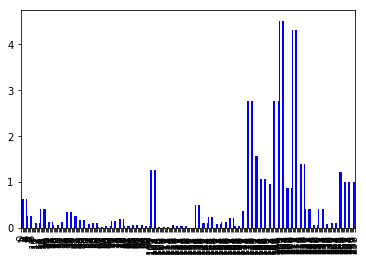

In [38]:
operaciones['SMA'].plot(kind='bar',color='b')

Algoritmo para la clasificación del movimiento:

# Configuración inicial para determinar los valores umbrales:

In [25]:
#Copiamos la columna Activity en la tabla de operaciones
#Esta columna servira como referencia para saber qué Actividad está realizando el usuario
#En una implementación real se le pediría al usuario realizar determinados movimientos para realizar esta configuración inicial
operaciones['Activity']=0
operaciones['Activity']=fixed_df['Activity']
operaciones

# Leyenda para la columna Actividad
# 1 Acostado, 2 Sentado, 3 Parado

,Resta_z,Resta_y,Resta_x,SVM,sumTime,SMA,Tilt,Activity
0,0.000000,0.000000,0.000000,0.000000,1.25,0.620995,0.350154,4
1,0.000000,0.000000,0.000000,0.000000,1.25,0.620995,0.350154,1
2,0.431159,0.002110,0.010532,0.666184,1.25,0.620995,0.350154,1
3,0.000000,0.000000,0.000000,0.000000,1.25,0.620995,0.465961,1
4,0.006735,0.003297,0.002081,0.110059,1.25,0.620995,0.465961,1
5,0.023235,0.004747,0.002081,0.173386,1.75,0.244893,0.580898,1
6,0.002201,0.001187,0.002080,0.073945,1.75,0.244893,0.439722,1
7,0.000000,0.000000,0.000000,0.000000,1.75,0.244893,0.514742,1
8,0.023235,0.008440,0.001170,0.181233,1.75,0.244893,0.514742,1
9,0.000000,0.000000,0.000000,0.000000,1.75,0.244893,0.275497,1


# Algoritmo para la clasificación del movimiento:

In [26]:
SMA_th=0.4
tilt_th=0.1
peak_th=0.2 #solo eje z

operaciones['Actividad']=0
operaciones[:3]

,Resta_z,Resta_y,Resta_x,SVM,sumTime,SMA,Tilt,Activity,Actividad
0,0.000000,0.00000,0.000000,0.000000,1.25,0.620995,0.350154,4,0
1,0.000000,0.00000,0.000000,0.000000,1.25,0.620995,0.350154,1,0
2,0.431159,0.00211,0.010532,0.666184,1.25,0.620995,0.350154,1,0


In [27]:
#Clasificacion entre actividad o descanso:
for x in range(0,operaciones.tail(1).index.item(),1): 
    if operaciones.loc[x]['SMA']> SMA_th: #Actividad
         if operaciones.loc[x]['Tilt']>tilt_th : operaciones['Actividad']=1 #Locomoción
         else #Transición  
    else: #Descanso ¿1 Acostado, 2 Sentado o 3 Parado?
        if operaciones.loc[x]['Tilt']>tilt_th : operaciones['Actividad']=1 #Acostado
    x=x+1;
     

SyntaxError: invalid syntax (<ipython-input-27-6023c415eeb3>, line 5)

In [28]:
fixed_df[:3]

,Time,Z,Y,X,IdAntenna,RSSI,Phase,Frequency,Activity
0,0.25,-0.044557,0.93932,0.11175,1,-60.0,0.46940,920.25,4
1,0.75,-0.044557,0.93932,0.11175,3,-68.5,0.15033,923.25,1
2,1.50,-0.044557,0.93932,0.11175,4,-57.5,5.10820,925.75,1


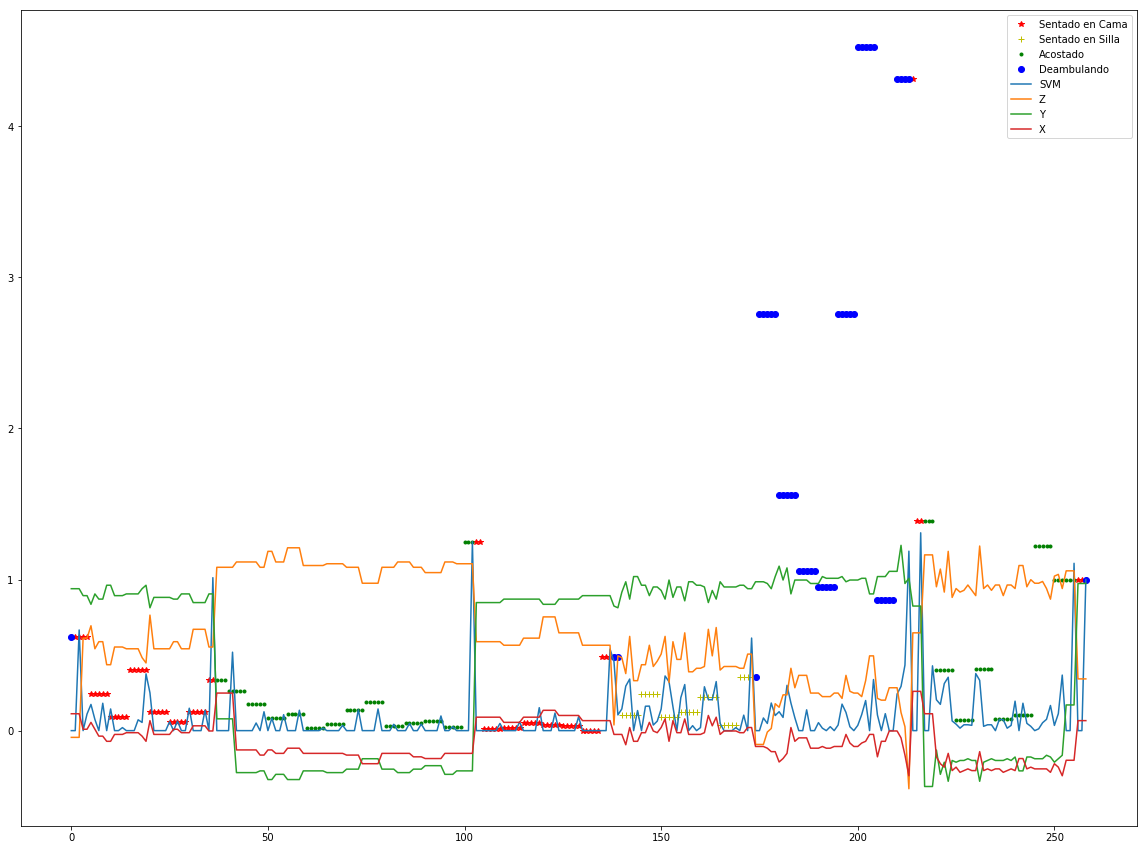

In [79]:
senCama=operaciones[operaciones.Activity==1]
senSilla=operaciones[operaciones.Activity==2]
acost=operaciones[operaciones.Activity==3]
deamb=operaciones[operaciones.Activity==4]
senCama['SMA'].plot(marker='*',linestyle='None',color='r',label='Sentado en Cama',figsize=(20,15))
senSilla['SMA'].plot(marker='+',linestyle='None',color='y',label='Sentado en Silla',figsize=(20,15))
acost['SMA'].plot(marker='.',linestyle='None',color='g',label='Acostado',figsize=(20,15))
deamb['SMA'].plot(marker='o',linestyle='None',color='b',label='Deambulando',figsize=(20,15))
operaciones['SVM'].plot()
fixed_df['Z'].plot()
fixed_df['Y'].plot()
fixed_df['X'].plot()
plt.legend()

In [36]:
fixed_df

,Time,Z,Y,X,IdAntenna,RSSI,Phase,Frequency,Activity
0,0.25,-0.044557,0.93932,0.111750,1,-60.0,0.469400,920.25,4
1,0.75,-0.044557,0.93932,0.111750,3,-68.5,0.150330,923.25,1
2,1.50,-0.044557,0.93932,0.111750,4,-57.5,5.108200,925.75,1
3,2.50,0.612070,0.89339,0.009122,4,-57.5,4.394900,920.75,1
4,3.00,0.612070,0.89339,0.009122,1,-65.0,3.638600,920.25,1
5,4.00,0.694140,0.83597,0.054735,4,-57.5,5.632800,925.75,1
6,5.00,0.541710,0.90487,0.009122,1,-67.5,0.084369,920.75,1
7,5.75,0.588620,0.87042,-0.036490,4,-57.0,0.191750,924.75,1
8,6.00,0.588620,0.87042,-0.036490,1,-66.5,1.811600,922.25,1
9,7.50,0.436190,0.96229,-0.070699,4,-57.0,0.948000,924.25,1
